<a href="https://colab.research.google.com/github/thecoco-cloud/Insurance_premium_prediction/blob/master/airbnb_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
airbnb_data = pd.read_csv('/content/drive/MyDrive/Kaggle/airbnb_data/AB_NYC_2019.csv')

In [3]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
airbnb_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
columns_to_drop = ['id', 'host_name', 'last_review']
airbnb_data.drop(columns_to_drop, axis = "columns", inplace = True)

In [8]:
airbnb_data[['name','price']]

,name,price
0,Clean & quiet apt home by the park,149
1,Skylit Midtown Castle,225
2,THE VILLAGE OF HARLEM....NEW YORK !,150
3,Cozy Entire Floor of Brownstone,89
4,Entire Apt: Spacious Studio/Loft by central park,80
...,...,...
48890,Charming one bedroom - newly renovated rowhouse,70
48891,Affordable room in Bushwick/East Williamsburg,40
48892,Sunny Studio at Historical Neighborhood,115
48893,43rd St. Time Square-cozy single bed,55


In [9]:
airbnb_data.fillna({'reviews_per_month':0},inplace = True )

In [10]:
airbnb_data.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [11]:
airbnb_data[['name','price','neighbourhood']]

,name,price,neighbourhood
0,Clean & quiet apt home by the park,149,Kensington
1,Skylit Midtown Castle,225,Midtown
2,THE VILLAGE OF HARLEM....NEW YORK !,150,Harlem
3,Cozy Entire Floor of Brownstone,89,Clinton Hill
4,Entire Apt: Spacious Studio/Loft by central park,80,East Harlem
...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,70,Bedford-Stuyvesant
48891,Affordable room in Bushwick/East Williamsburg,40,Bushwick
48892,Sunny Studio at Historical Neighborhood,115,Harlem
48893,43rd St. Time Square-cozy single bed,55,Hell's Kitchen


In [12]:
airbnb_data.nlargest(10, 'number_of_reviews')

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [13]:
airbnb_data['neighbourhood_group'].unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
airbnb_data['neighbourhood_group'].value_counts()


Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [15]:
airbnb_data['neighbourhood'].unique()


array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [16]:
airbnb_data['neighbourhood'].value_counts().head(10)


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [17]:
print(airbnb_data['neighbourhood_group'])

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object


In [18]:
airbnb_data[airbnb_data['neighbourhood_group'] == 'Manhattan']

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,Comfy 1 Bedroom in Midtown East,274311461,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,0.00,1,176
48888,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,0.00,1,31
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [19]:
airbnb_data[airbnb_data['neighbourhood_group'] == 'Manhattan']['price'].mean()

196.8758136743456

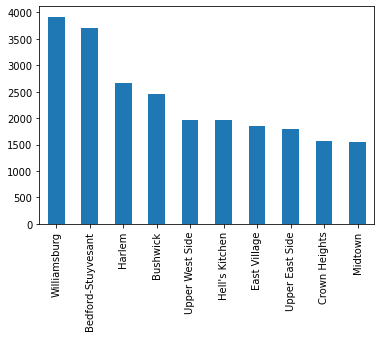

In [20]:
airbnb_data['neighbourhood'].value_counts().head(10).plot(kind = 'bar')

In [21]:
import seaborn as sns

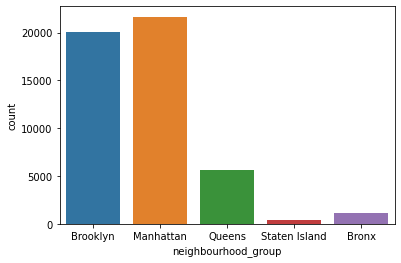

In [22]:
sns.countplot(data = airbnb_data, x = 'neighbourhood_group')

In [23]:
airbnb_data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [24]:
classement = airbnb_data['neighbourhood_group'].value_counts().index

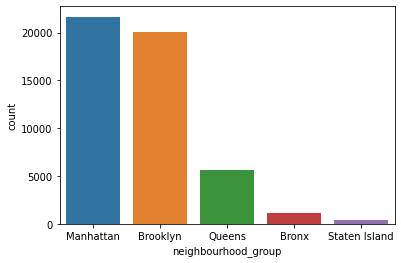

In [25]:
sns.countplot(data = airbnb_data, x = 'neighbourhood_group', order = classement)

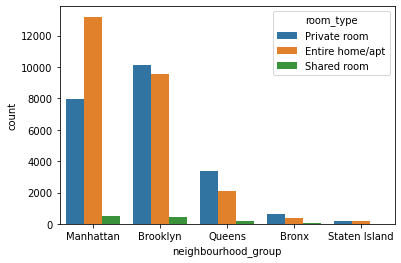

In [26]:
sns.countplot(data = airbnb_data, x = 'neighbourhood_group', order = classement, hue = 'room_type')

In [27]:
airbnb_data.shape

(48895, 13)

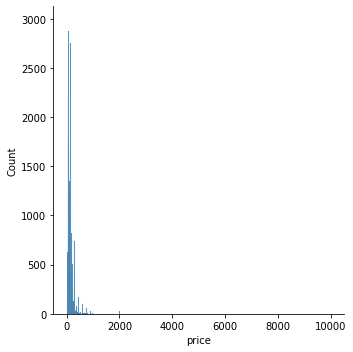

In [28]:
sns.displot(airbnb_data['price'])

In [29]:
affordable_df = airbnb_data[airbnb_data['price']<300]

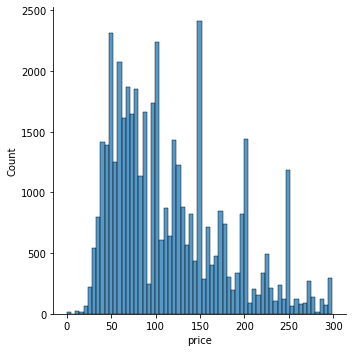

In [30]:
sns.displot(affordable_df['price'])

In [37]:
affordable_df['price'].mean(), airbnb_data['price'].mean()

(116.01752006581141, 152.7206871868289)

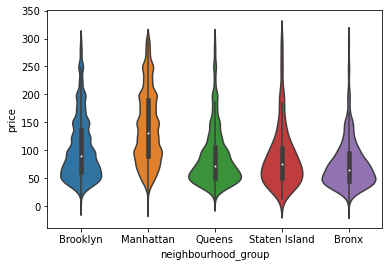

In [41]:

sns.violinplot(data = affordable_df, x = 'neighbourhood_group', y = 'price')